In [ ]:
'''
#https://drive.google.com/file/d/1FA00asYoZMgzaEbmY_N2wqGwbuc0MpJf/view?usp=sharing

FILEID = "1FA00asYoZMgzaEbmY_N2wqGwbuc0MpJf"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O Alucar.jpg && rm -rf /tmp/cookies.txt
'''

'\n#https://drive.google.com/file/d/1FA00asYoZMgzaEbmY_N2wqGwbuc0MpJf/view?usp=sharing\n\nFILEID = "1FA00asYoZMgzaEbmY_N2wqGwbuc0MpJf"\n!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \'https://docs.google.com/uc?export=download&id=\'$FILEID -O- | sed -rn \'s/.*confirm=([0-9A-Za-z_]+).*/\x01\n/p\')&id="$FILEID -O Alucar.jpg && rm -rf /tmp/cookies.txt\n'

(640, 640, 3)

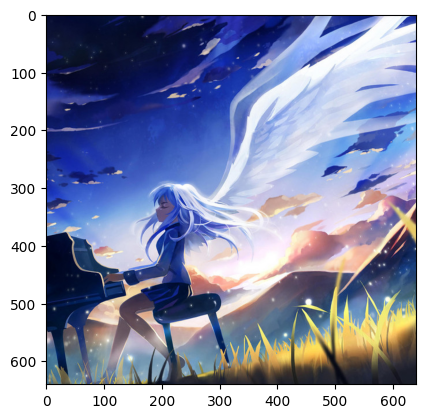

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image = imread(os.path.join("AngelBeats.jpeg"))
plt.imshow(image)
image.shape

In [ ]:
X = image.reshape(-1,3)
X.shape

(409600, 3)

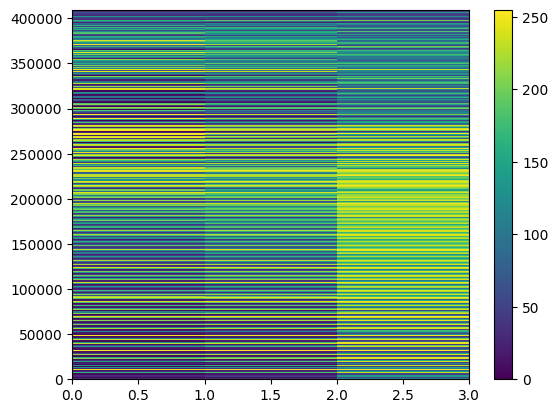

In [ ]:
plt.pcolormesh(X)
plt.colorbar()

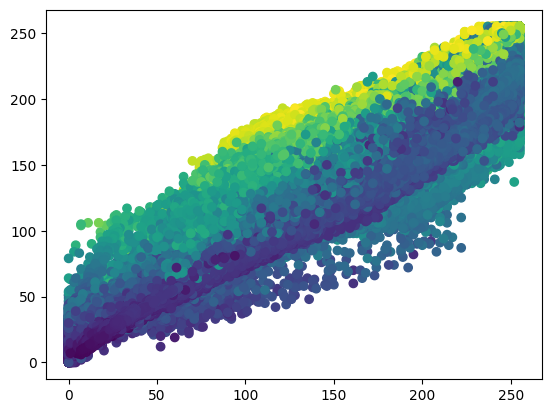

In [ ]:
plt.scatter(X[:,0], X[:,1], c=X[:,2])
plt.show()

In [ ]:
def coorImag(dimension):
  alto = image[:,0,0].shape
  ancho = image[0,:,0].shape
  vector = np.zeros((alto[0]*ancho[0], 2))
  for i in range(ancho[0]):
    for j in range(alto[0]):
      vector[i*alto[0]+j,0] = j
      vector[i*alto[0]+j,1] = i
  return vector

In [ ]:
from mmap import ALLOCATIONGRANULARITY
def coorImagen_(dimension):
  alto = image[:,0,0].shape
  ancho = image[0,:,0].shape
  alto_ = np.linspace(0, alto[0]-1, alto[0])
  ancho_ = np.linspace(0, ancho[0]-1, ancho[0])
  an_uno = np.ones(ancho[0])
  al_uno = np.ones(alto[0])
  alto_ = np.kron(an_uno, alto_)
  ancho_ = np.kron(ancho_, al_uno)
  return alto_, ancho_
vector_1, vector_2 = coorImagen_(image.shape)
print (vector_1, vector_1.shape)
print (vector_2, vector_2.shape)
X = np.hstack((X, vector_1.reshape(-1,1)))
X = np.hstack((X, vector_2.reshape(-1,1)))
X.shape

[  0.   1.   2. ... 637. 638. 639.] (409600,)
[  0.   0.   0. ... 639. 639. 639.] (409600,)


(409600, 5)

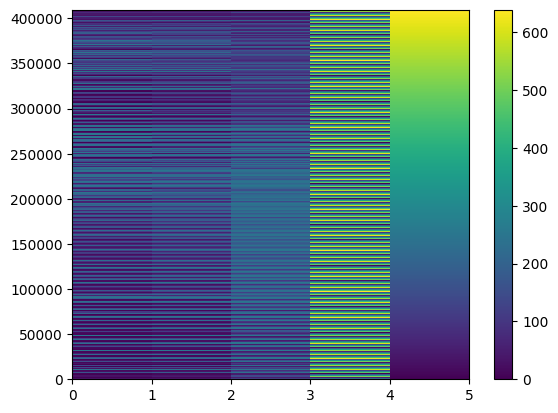

In [ ]:
plt.pcolormesh(X)
plt.colorbar()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_ = scaler.transform(X)

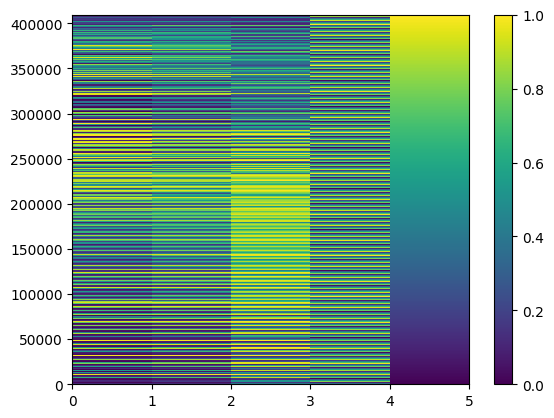

In [ ]:
plt.pcolormesh(X_)
plt.colorbar()

In [ ]:
from sklearn.cluster import KMeans
k      = 4
kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++')
y_pred = kmeans.fit_predict(X_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_pred

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
centro = kmeans.cluster_centers_[:,:]
centro.shape

(4, 5)

In [ ]:
from scipy.spatial import distance

centroide = distance.cdist(X_[:,:], centro, 'euclidean')
centroide.shape

(409600, 4)

In [ ]:
index_array = np.argmin(centroide, axis=0)
index_array.shape

(4,)

In [ ]:
print (index_array)

[184165 108316 323023 292682]


In [ ]:
centroid_rgb = X_[index_array,:3]

In [ ]:
Xs = centroid_rgb[y_pred-1]
Xs = Xs.reshape(image.shape)
Xs.shape

(640, 640, 3)

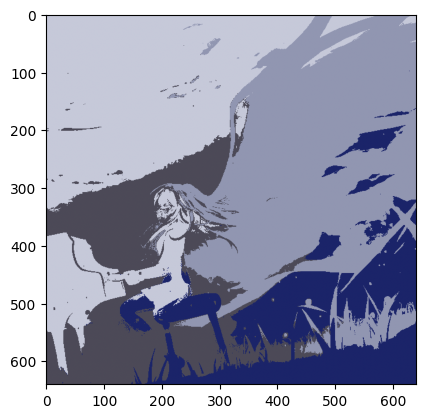

In [ ]:
plt.imshow(Xs)